In [10]:
import sys
print(sys.version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]


# Hypothesis Testing

In this lesson, we'll learn about hypothesis testing and statistical significance. A hypothesis is a pattern or rule about a process that we can test. We use hypothesis testing to determine if a change we made had a meaningful impact or not.

Hypothesis testing allows us to calculate the probability that random chance was responsible for the difference in outcome. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a more likely conclusion.

Let's begin with a **null hypothesis** that describes the status quo, then state an **alternative hypothesis**. We use the alternate hypothesis in comparison with the null hypothesis to decide which describes the data better. In the end, we need to do one of the folllowing:

- Reject the null hypothesis
- Fail to reject the null hypothesis

### Example

- If a new weight loss pill helped people lose more weight:

  - Null hypothesis: Patients who went on the weight loss pill didn't lose any additional weight compared to those who did not take the pill.

  - Alternative hypothesis: Patients who went on the weight loss pill lost more weight than those who didn't.
  

To help us determine if the weight loss pill was effective, we conducted a study with 100 volunteers and split them into two groups randomly:

- Group A received a placebo to consume on a daily basis.


- Group B received the actual weight loss pill to consume on a daily basis.


Both groups received instructions not to change anything else about their diets. Group A is referred to as the control group while group B is referred to as the treatment group. This type of study is called a blind experiment since the participants didn't know which pill they were receiving. This helps us reduce the potential bias that is introduced when participants know which pill they were given. For example, participants who are aware they are given the weight loss pill may try to add healthier foods to their diet to help them lose more weight. Both groups were weighed before the study began and a month after the study ended.

In [3]:
file_loc='Datasets/weight_loss.csv'
df = pd.read_csv(file_loc,header=None,names=['weight_lost_a','weight_lost_b'])

In [4]:
print(df.shape)
df.head()


(50, 2)


,weight_lost_a,weight_lost_b
0,3,5
1,2,4
2,3,5
3,4,5
4,3,4


In [5]:
mean_group_a = df['weight_lost_a'].mean()
mean_group_b = df['weight_lost_b'].mean()

print(f'Group_A average weight loss is {mean_group_a}')
print(f'Group_B average weight loss is {mean_group_b}')

Group_A average weight loss is 2.82
Group_B average weight loss is 5.34


To determine which hypothesis accurately describes the data, we need to frame the hypotheses quantitatively. The first step is to decide a test statistic, which is a numerical value that summarizes the data and one we can use in statistical formulas. The test statistic runs a statistical test that determines whether the difference between the groups was due to random chance.

Since we want to know if the amount of weight lost between the groups is significantly different, we will use the difference in the means(also known as the mean difference) of weight lost for each group as the test statistic.

- Null hypothesis: $X_b$ - $X_a$ = 0


- Alternative hypothesis: $X_b$ - $X_a$ >0

In [41]:
mean_difference = mean_group_b - mean_group_a
print(f'Mean difference between group b and group a is {mean_difference}')

Mean difference between group b and group a is 2.52


The <font color='green'>permutation test</font> is a statistical test that involves rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the <font color='green'>sampling distribution</font> and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of <font color='red'>2.52</font>) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, that the weight loss pill doesn't help people lose more weight, then the observed mean difference of <font color='red'>2.52</font>) should be quite common in the sampling distribution. If it's instead extremely rare, then we should reject the null hypothesis instead.



To simulate rerunning the study, we randomly reassign each data point (weight lost) to either group A or group B. We keep track of the recalculated test statistics as a separate list. By re-randomizing the groups that the weight loss values belong to, we're simulating what randomly generated groupings of these weight loss values would look like. We then use these randomly generated groupings to understand how rare the groupings in our actual data were.




In [7]:
list_a =  df['weight_lost_a'].to_list()
list_b = df['weight_lost_b'].to_list()
all_values = list_a + list_b
print(len(all_values))
print(sum(all_values))

100
408


In [8]:
mean_differences = []
for _ in range(0,1000):
    group_a, group_b = [],[]
    np_rand = np.random.rand(1,100)
    for index,value in enumerate(all_values):
        if np_rand[0][index]>= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
            
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)




In [9]:
mean_differences[:5]
print(len(mean_differences))

1000


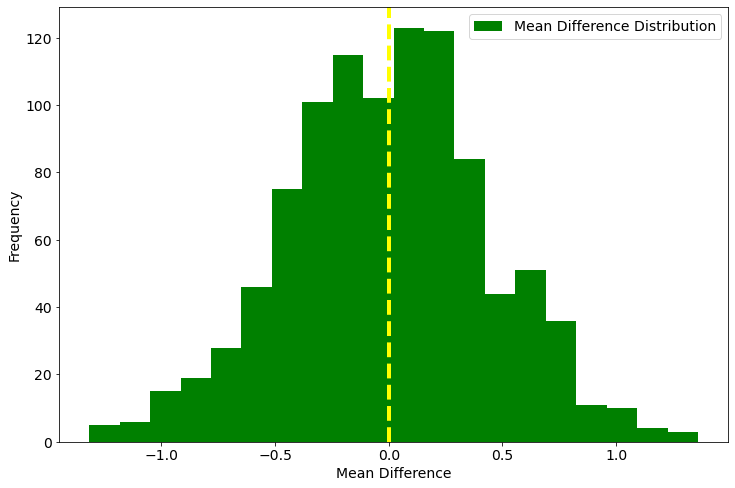

In [35]:
fig,ax = plt.subplots(figsize=(12,8))

ax.axvline(0,linewidth = 4,color='yellow',linestyle='--')
ax.hist(mean_differences,bins=20,label='Mean Difference Distribution',color='green')
ax.legend(fontsize=14)
ax.set_xlabel('Mean Difference',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


In [39]:
'''
Now let's create a sampling frequency distribution table
'''

sampling_distribution = {}

for mean in mean_differences:
    #return the mean in dictionary, else return default False
    if sampling_distribution.get(mean,False):
        val = sampling_distribution.get(mean)
        inc = val +1
        sampling_distribution[mean] = inc
    else:
        sampling_distribution[mean] = 1


In [42]:
frequencies=[]
for sample_mean_diff in sampling_distribution:
    if sample_mean_diff > mean_difference:
        frenquencies.append(sampling_distribution['sample_mean_diff'])

p_value = np.sum(frequencies)/1000

print(f'P_value is equity to {p_value}')

P_value is equity to 0.0


In [43]:
frequencies

[]

### My understanding about Significant Testing

- We want to understand whether the weight loss pile have significant effect to people, we have two groups of people, group_a do not take weight loss pile, while group_b take the pile. After a period, we measure the average weight loss in each group and we found the average weight loss in group_B is 5.3 and is almost double weight loss in group_A 2.8. The mean differnece is 5.3-2.8 = 2.5


- We want to find out whether it was really due to the effect of the pile or just simply because of sampling error


- We establised a hypothesis test, where the NULL hypothesis is that there's no difference in the mean amount of weight lost by participants in both groups; and the Alternative hypothesis is that people who use weight loss pill actually lost more weight.


- We mixed samples from two groups and randomly pick equal amount of sampels to form NEW group_A and New group_B, we then calculated the mean different between these two New groups. We simulate the ramdom sampling for 1000 times.


- After 1000 times simulation, we get a list of 1000 mean difference of weight losses, and the outcome shows that there was not even 1 out of 1000 sample that has mean weight loss different greater than the actual number, this means in reality, the pile mush have some sort of effect to group B. 


- The P-Value is the probability (number of outcomes that mean difference greater than 2.5 / total number of outcomes in this case 1000 simulations). 


- The P-value is calculated as 0, which means, the result is significant (compare to the signicant level of 5%), and we can reject the Null Hypothesis. 